from types import TracebackType
# Title and the pipeLine :
## BPM Calculator


* Import required Libraries
* Load the Dataset (ETL)
* Data preVisualisation/Augmentation
* Data Preprocessing
* Model Building : start with logistic regresion (since small dataset must yield good result)
                   Decision Tree
                   Random Forest
                   gradienct boost
                   if required XGBoost



## 0 . import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


##1 Loading the dataset from csv Files

In [ ]:
from pathlib import Path
import zipfile
import requests

data_path = Path("data")

if data_path.is_dir():
    print(f"Folder already present at {data_path}")
else:
    print(f"Path doesn't exist, making one....")
    data_path.mkdir(parents=True, exist_ok=True)

url = "https://raw.githubusercontent.com/tether007/MNSIT_tinyVGG/main/gdg_ML_DATASET.zip"

zip_file_path = data_path / "dataset.zip"
print("Downloading the zip file...")
response = requests.get(url)

with open(zip_file_path, "wb") as f:
    f.write(response.content)

print("Unzipping the data...")
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(data_path)

print("Done! Files are in:", data_path)


### 1.1 . Loading train data

In [ ]:
train_data = pd.read_csv("/content/data/train.csv")

In [ ]:
train_data.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


### 1.2 . Some data viz with preprocessing (if required)

In [ ]:
train_data.describe()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
count,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000
mean,262081.500000,0.632843,-8.379014,0.074443,0.262913,0.117690,0.178398,0.555843,241903.692949,0.500923,119.034899
std,151313.257586,0.156899,4.616221,0.049939,0.223120,0.131845,0.118186,0.225480,59326.601501,0.289952,26.468077
min,0.000000,0.076900,-27.509725,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067,46.718000
25%,131040.750000,0.515850,-11.551933,0.023500,0.069413,0.000001,0.077637,0.403921,207099.876625,0.254933,101.070410
50%,262081.500000,0.634686,-8.252499,0.066425,0.242502,0.074247,0.166327,0.564817,243684.058150,0.511800,118.747660
75%,393122.250000,0.739179,-4.912298,0.107343,0.396957,0.204065,0.268946,0.716633,281851.658500,0.746000,136.686590
max,524163.000000,0.975000,-1.357000,0.256401,0.995000,0.869258,0.599924,0.978000,464723.228100,1.000000,206.037000


<Axes: >

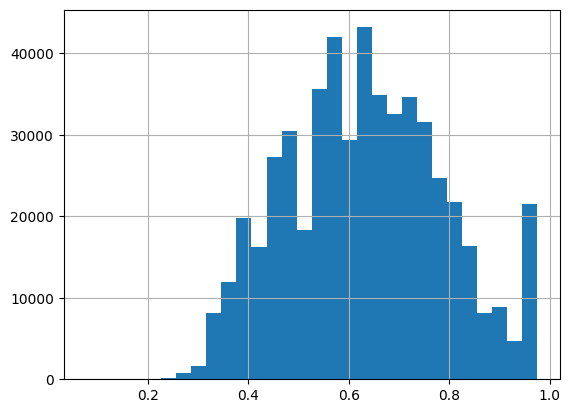

In [ ]:
train_data['RhythmScore'].hist(bins=30)

# this says there are more no:of songs with 0.4-0.8 RythmScore

<Axes: >

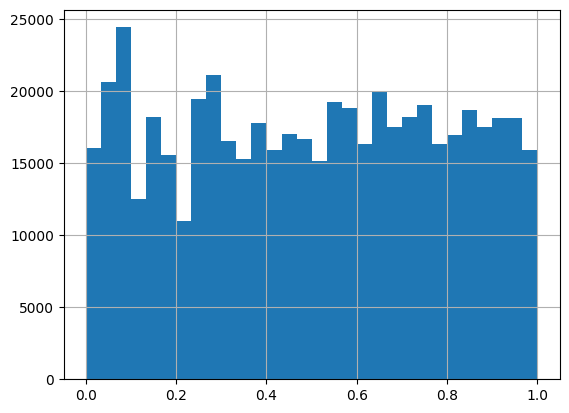

In [ ]:
train_data['Energy'].hist(bins=30)

<Axes: xlabel='BeatsPerMinute', ylabel='Count'>

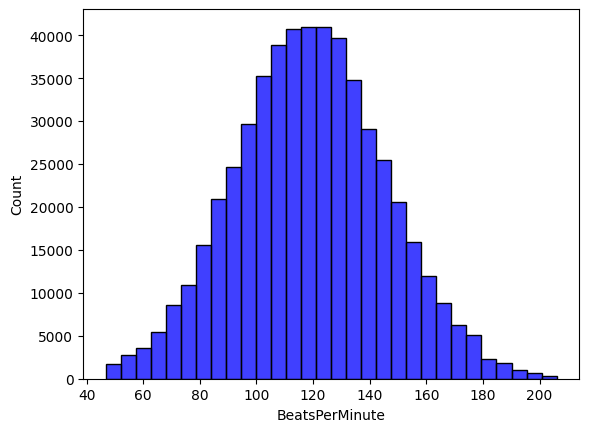

In [ ]:

sns.histplot(train_data['BeatsPerMinute'],bins=30,color='blue')
# bins=30,xlabel='range_of_bpm',ylabel='freq_of_songs_in_each_bin'

In [ ]:
train_data.isnull().sum()#fairly clean dataset

,0
id,0
RhythmScore,0
AudioLoudness,0
VocalContent,0
AcousticQuality,0
InstrumentalScore,0
LivePerformanceLikelihood,0
MoodScore,0
TrackDurationMs,0
Energy,0


#### To see some strong feature relation let us see the features correlation heatmap

<Axes: >

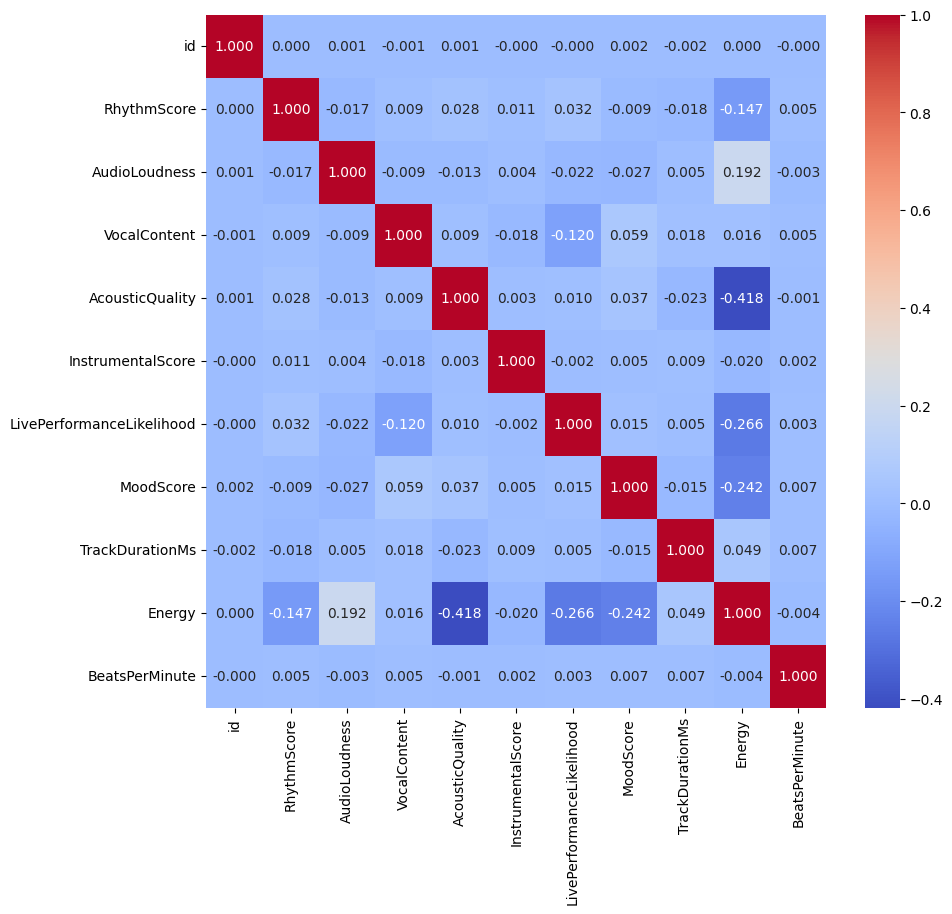

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
figure=plt.figure(figsize=[10,9])

corr=train_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".3f")


This correlation maps says there's actually not much correlation of any feature to the actual BPM except 'trackduration','moodscore' and 'rythmscore'

what if? we find a new metric or feature into the dataset to see if that works out like, let us see if we can catogorize into diff moods

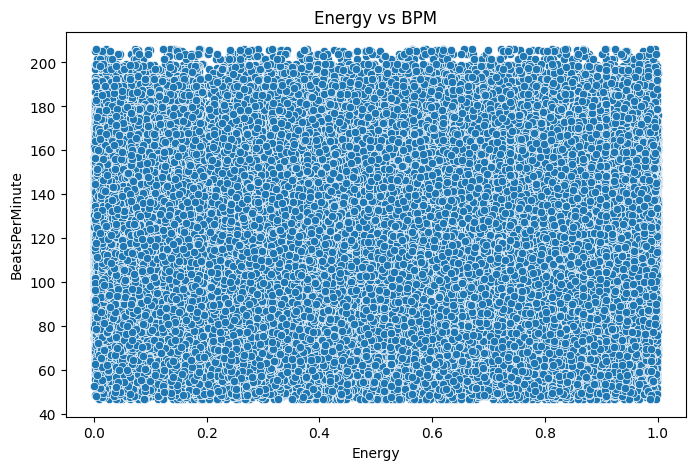

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Energy", y="BeatsPerMinute", data=train_data, alpha=1)
plt.title("Energy vs BPM")
plt.show()

#not a great feature

In [ ]:
# train_data["BPM_moods"] = pd.cut(train_data["BeatsPerMinute"], bins=[0,80,120,300], labels=["Upbeat","neutral","Too_chill"])
# sns.boxplot(x="BeatsPerMinute", y="MoodScore", data=train_data)


In [ ]:
train_data.head(2)

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.02350,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.07152,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963


In [ ]:
print(type(train_data))



<class 'pandas.core.frame.DataFrame'>


In [ ]:
train_data.replace({'TrackDurationMs': 0, 'Energy': 0}, np.nan, inplace=True)

In [ ]:
train_data.isna().sum()

,0
id,0
RhythmScore,0
AudioLoudness,0
VocalContent,0
AcousticQuality,0
InstrumentalScore,0
LivePerformanceLikelihood,0
MoodScore,0
TrackDurationMs,0
Energy,0


## 2 . Since this is a Linear regression problem let us simply use the baseline model as it is

### 2.1 . Scale the model using MinMaxScaler for modelling and also K-NN

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

X = train_data.drop(columns=["id", "BeatsPerMinute"])
y = train_data["BeatsPerMinute"]

# imputing missing values
imputer = KNNImputer(n_neighbors=3)
X_imputed = imputer.fit_transform(X)


In [ ]:
X_imputed

array([[ 6.03609719e-01, -7.63694209e+00,  2.35000000e-02, ...,
         4.09866259e-01,  2.90715645e+05,  8.26266667e-01],
       [ 6.39451219e-01, -1.62675983e+01,  7.15195030e-02, ...,
         6.51010252e-01,  1.64519517e+05,  1.45400000e-01],
       [ 5.14537839e-01, -1.59535751e+01,  1.10714510e-01, ...,
         4.23864960e-01,  1.74495567e+05,  6.24666667e-01],
       ...,
       [ 5.42957993e-01, -1.35700000e+00,  7.13895030e-02, ...,
         5.86867993e-01,  3.44858232e+05,  7.18800000e-01],
       [ 6.37191915e-01, -7.41133073e+00,  1.13085617e-01, ...,
         3.68891131e-01,  3.22710319e+05,  9.44266667e-01],
       [ 7.76514621e-01, -5.48409138e+00,  2.35000000e-02, ...,
         7.93487305e-01,  3.13870057e+05,  2.23933333e-01]])

In [ ]:

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
X_scaled=scaler.fit_transform(X_imputed)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [ ]:
train_data = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

In [ ]:
train_data

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0.586471,0.759874,0.000000,0.000000,0.000000,0.047054,0.403472,0.565795,0.826255,147.53020
1,0.626379,0.429864,0.206180,0.447162,0.401968,0.254024,0.656668,0.250896,0.145343,136.15963
2,0.487293,0.441872,0.374470,0.174567,0.522070,0.009165,0.418170,0.275789,0.624642,55.31989
3,0.732171,1.000000,0.126511,0.001654,0.183739,0.107824,0.265797,0.403230,0.487432,147.91212
4,0.507815,0.552649,0.000000,0.069027,0.000000,0.533413,0.474768,0.374267,0.947330,89.58511
...,...,...,...,...,...,...,...,...,...,...
524159,0.801616,0.539297,0.000000,0.507272,0.000000,0.290318,0.674589,0.178553,0.004334,117.83118
524160,1.000000,0.587962,0.231339,0.069806,0.301773,0.174625,0.276508,0.441014,0.447030,89.02681
524161,0.518938,1.000000,0.205622,0.169823,0.000000,0.503127,0.589320,0.700898,0.718781,90.75885
524162,0.623864,0.768501,0.384651,0.000000,0.071262,0.458048,0.360448,0.645632,0.944263,140.63235


### Split the data now

In [ ]:
X = train_data.drop(columns=["BeatsPerMinute"])
y = train_data["BeatsPerMinute"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,               # features and target
    test_size=0.2,      # 20% for testing, 80% for training
    random_state=42     # reproducible results
)

## 3 . Baseline Model

In [ ]:
from sklearn.linear_model import LinearRegression
baseline = LinearRegression()#instancing the obj

In [ ]:
baseline.fit(X_train,y_train)

LinearRegression()

### Predictions(LR_model)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred_lr=baseline.predict(X_test)


# Metrics
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

MSE: 699.2787814313143
MAE: 21.18413934145927
R2 Score: 9.495687914695683e-05


### Let us benchmark the model's performance

In [ ]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error

def eval_metrics(y_pred,y_test):
  print(f"MSE:{mean_absolute_error(y_test,y_pred)}")
  print(f"mae : {root_mean_squared_error(y_test, y_pred)}")

eval_metrics(y_test=y_test,y_pred=y_pred_lr)




MSE:21.18413934145927
mae : 26.443879848299762


## 4 . RandomForest
* trained it seperately as it was taking long ill just load it here


### THE MODEL WHICH IS SAVED IS LITERAALLY 5.3GB so i wont be loading it but will show the code

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestRegressor

# #
# #rf = Pipeline(steps=[
# #         ("preprocess", preprocessor),
# #         ("model", RandomForestRegressor(n_estimators=150, random_state=42, n_jobs=-1)),
# #     ])
# #     rf.fit(X_train, y_train)
# #     rf_preds = rf.predict(X_valid)
# #     rf_mae, rf_rmse, rf_r2 = evaluate(y_valid.values, rf_preds)
# #     print(f"RandomForest -> MAE: {rf_mae:.4f} | RMSE: {rf_rmse:.4f} | R2: {rf_r2:.4f}")
# #     joblib.dump(rf, os.path.join(models_dir, "RandomForest.joblib"))

## 5 . XGBoost Model

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500,      # Mosttrees
    max_depth=3,           # Shallowertrees
    learning_rate=0.01,    # Much slower learning
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=3,    # More regularization
    reg_alpha=0.1,         # L1 regularization
    reg_lambda=1.0,        # L2 regularization
    random_state=42,
    n_jobs=-1,
    verbosity=0
)


In [ ]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=3, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=-1, num_parallel_tree=None, ...)

### predictions and Evals

In [ ]:
y_pred_xgb=xgb.predict(X_test)

In [ ]:
eval_metrics(y_pred=y_pred_xgb,y_test=y_test)

MSE:21.18158019877327
mae : 26.439863582857903


## 6 . Saving the Model

In [ ]:
import joblib

In [ ]:
joblib.dump(baseline,"baseline_lr.joblib")

['baseline_lr.joblib']

In [ ]:
joblib.dump(xgb,"xgb.joblib")

['xgb.joblib']

In [ ]:
sklearn.__version__

'1.6.1'